<a href="https://colab.research.google.com/github/AbirLOUARD/COVID_Analysis/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, widgets

In [80]:
death_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
state_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [82]:
print(death_data.shape)
print(confirmed_data.shape)
print(recovered_data.shape)
print(state_data.shape)


(284, 801)
(284, 801)
(269, 801)
(198, 16)


In [77]:
death_data.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22,3/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7652,7654,7654,7656,7657,7657,7657,7657,7662,7663
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3487,3487,3487,3489,3489,3489,3490,3491,3491,3491
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6871,6871,6872,6873,6873,6873,6873,6873,6873,6873
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,155,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,135,135,135,135,135,135,135,135,135,135
7,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,127483,127494,127599,127675,127752,127780,127846,127904,127909,127943
8,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,8593,8595,8598,8601,8603,8604,8607,8608,8610,8610
9,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,38,38,38,38,38,39,39,39,39,39


In [83]:
country = ['Canada', 'France', 'Morocco']
state_data[state_data['Country_Region'].isin(country)]

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
33,Canada,2022-03-29 16:20:59,60.0010,-95.0010,3461909,37537,NaN,NaN,9051.663505,NaN,NaN,1.084286,124,CAN,157182,820
63,France,2022-03-29 16:20:59,46.2276,2.2137,25246720,142855,NaN,NaN,38692.384287,NaN,NaN,0.565836,250,FRA,2368794,3473
122,Morocco,2022-03-29 16:20:59,31.7917,-7.0926,1163012,16058,NaN,NaN,3150.892490,NaN,NaN,1.380725,504,MAR,2037,70


In [84]:
state_data.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Cases_28_Days',
       'Deaths_28_Days'],
      dtype='object')

In [86]:
global_data = state_data.copy().drop(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Active', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'], axis=1)
global_synthese= pd.DataFrame(global_data.sum()).transpose()
global_synthese

,Confirmed,Deaths,Recovered,Cases_28_Days,Deaths_28_Days
0,482747259.0,6129282.0,0.0,45159178.0,169597.0


In [89]:
fig=go.FigureWidget(layout=go.Layout())
def highlight_col(x):
  r='background-color:red'
  y='background-color:grey'
  g='background-color:green'
  df1=pd.DataFrame('',index=x.index,columns=x.columns)
  df1.iloc[:,4]=y
  df1.iloc[:,5]=r
  df1.iloc[:,6]=g

  return df1

def show_cases(n):
  n=int(n)
  return state_data.sort_values('Confirmed',ascending=False).head(n).style.apply(highlight_col,axis=None)

interact(show_cases,n='10')

ipywLayout=widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig],layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [92]:
state_class_d= state_data.sort_values('Confirmed',ascending=False)
state_class_d.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Cases_28_Days',
       'Deaths_28_Days'],
      dtype='object')

In [96]:
state_class_d.columns
px.bar(
   state_class_d.head(10),
   x= 'Country_Region',
   y= 'Confirmed',
  title='The 10 countries most affected by coronavirus (confirmed cases)',
  color_discrete_sequence=['grey'],
  height=500,
  width=800
)

In [97]:
state_class_d.columns
px.bar(
   state_class_d.head(10),
   x= 'Country_Region',
   y= 'Deaths',
  title='The 10 countries most affected by coronavirus ( death cases)',
  color_discrete_sequence=['red'],
  height=500,
  width=800
)

In [99]:
state_class_d.columns
px.bar(
   state_class_d.head(10),
   x= 'Country_Region',
   y= 'Recovered',
  title='The 10 countries most affected by coronavirus (recovered cases)',
  color_discrete_sequence=['green'],
  height=500,
  width=800
)

In [100]:
conf_fr=confirmed_data[confirmed_data['Country/Region']=='France']
death_fr=death_data[death_data['Country/Region']=='France']
recov_fr=recovered_data[recovered_data['Country/Region']=='France']

In [101]:
conf_fr=conf_fr.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
death_fr=death_fr.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
recov_fr=recov_fr.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()

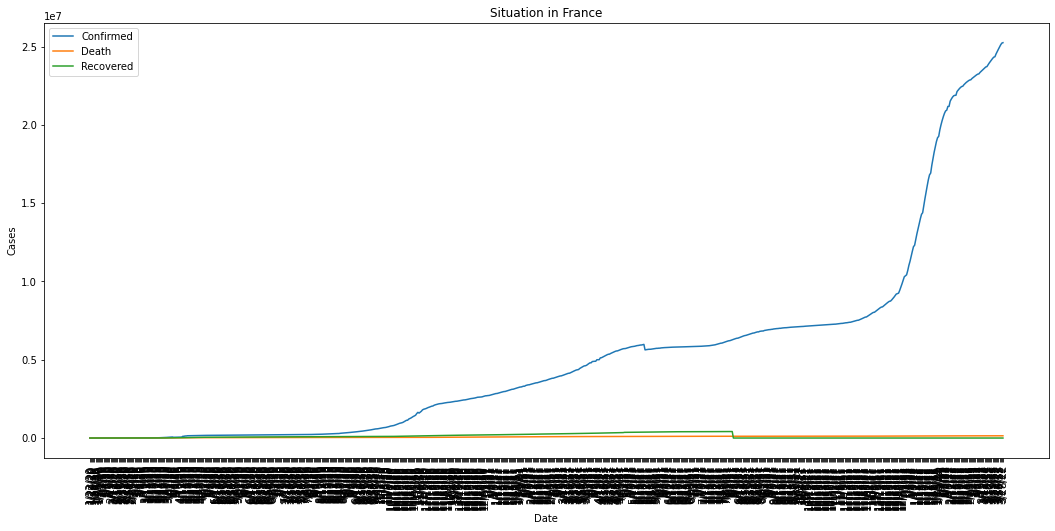

In [102]:

fig,ax= plt.pyplot.subplots(figsize =(18,8))
ax.plot(conf_fr.index,conf_fr.values,label='Confirmed')
ax.plot(death_fr.index,death_fr.values,label='Death')
ax.plot(recov_fr.index,recov_fr.values,label='Recovered')

plt.pyplot.xticks(rotation='vertical')
ax.set(xlabel='Date',ylabel='Cases',title='Situation in France')
plt.pyplot.legend()